1. **Defining the question**
 
 The main purpose of this analysis is to identify which individuals are most likely to have or use a bank account

Loading the required libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
df = pd.read_csv('/content/Financial Dataset - 1.csv')

In [ ]:
# Checking the shape of the data
df.shape

(23524, 13)

In [ ]:
# Viewing the top values of the data
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Viewing the bottom values of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking the general information of the data
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# Confirming the correctness of the data types within the dataframe
df.dtypes

country                    object
year                        int64
uniqueid                   object
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
the_relathip_with_head     object
marital_status             object
level_of_educuation        object
type_of_job                object
dtype: object

In [ ]:
# Cleaning column headers
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

**Assumptions while dealing with the missing values**

Worth noting is that most of the missing values are categorical in nature. These shall be encoded to not supplied and included or excluded as need be during the analysis

1. **country** - Since all the data comes from East African region the missing values will not affect analysis of the region. However while narrowing down into an individual country they shall be encoded as **Not Supplied**

2. **Has a Bank account** - will be encoded to **Not Supplied**. However, it is worth noting that they may be having access to other innovative banking solution through mobile money

3. 

In [ ]:
# Removing duplicate values
df = df.drop_duplicates()

In [ ]:
# Checking if there is any change after dropping duplicates
df.shape

**2. UNIVARIATE ANALYSIS**

2.1 "country" column

In [ ]:
# Country participating in the survey summary
df.country.value_counts()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64

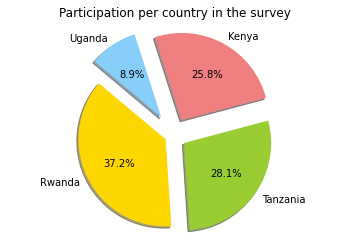

In [ ]:
# Visualizing the counts using a pie chart
x = list(df.country.value_counts())
labels = ['Rwanda','Tanzania','Kenya','Uganda']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.15, 0.2, 0.25)
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Participation per country in the survey')
plt.show()

**Findings**

There were more respondents in Rwanda than in Kenya for the study

2.2 "year" column

In [ ]:
# Looking at the years
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [ ]:
# Clearly there are entries that have not been encoded correctly
df.year.value_counts()

2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [ ]:
# # Since they are only three which is negligible we can redistribute them back uniformly over the remaining years
df['year'] = df['year'].replace([2029,2056,2039],[2017,2016,2018])

Text(0, 0.5, 'Count')

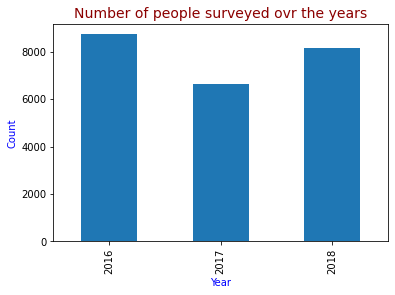

In [ ]:
# Number of participants over the years
df['year'].value_counts().sort_index().plot.bar()
plt.title('Number of people surveyed ovr the years', fontdict=title)
plt.xlabel('Year', fontdict=others)
plt.ylabel('Count', fontdict=others)

In [ ]:
# Looking at the has_a_bank_account column
df.has_a_bank_account.value_counts()

No     20179
Yes     3309
Name: has_a_bank_account, dtype: int64

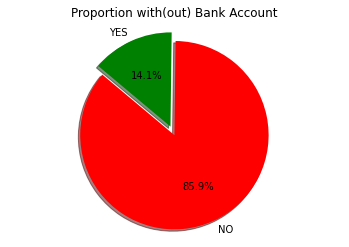

In [ ]:
# Visualising proportion of the bank and unbanked population
x = list(df.has_a_bank_account.value_counts())
labels = ['NO','YES']
colors = ['red', 'green']
explode = (0.1, 0)
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Proportion with(out) Bank Account')
plt.show()

Text(0, 0.5, 'Count')

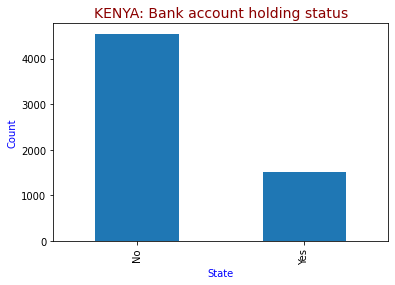

In [ ]:
# Visualization per country
# KENYA
df[df.country == 'Kenya']['has_a_bank_account'].value_counts().plot.bar()
plt.title('KENYA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

Text(0, 0.5, 'Count')

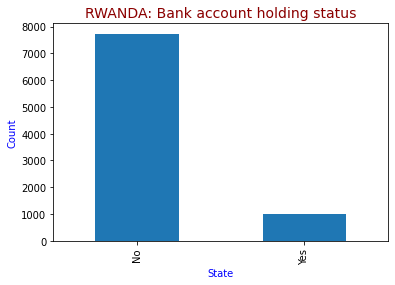

In [ ]:
# RWANDA
df[df.country == 'Rwanda']['has_a_bank_account'].value_counts().plot.bar()
plt.title('RWANDA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

Text(0, 0.5, 'Count')

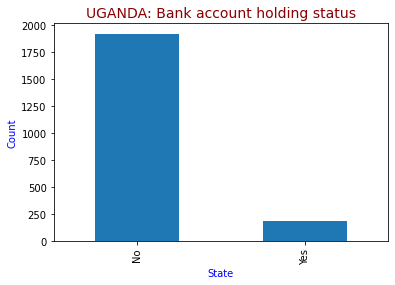

In [ ]:
# UGANDA
df[df.country == 'Uganda']['has_a_bank_account'].value_counts().plot.bar()
plt.title('UGANDA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

Text(0, 0.5, 'Count')

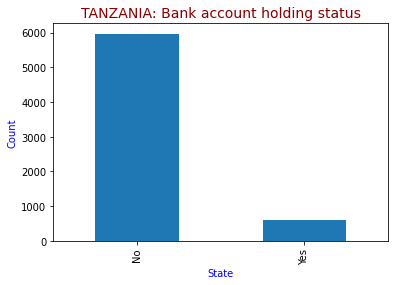

In [ ]:
# TANZANIA
df[df.country == 'Tanzania']['has_a_bank_account'].value_counts().plot.bar()
plt.title('TANZANIA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

**Findings**

Most of the respondents are NOT formally banked **(85.9%)**

In [ ]:
# Looking at the location
df.type_of_location.value_counts()

Rural    14338
Urban     9171
Name: type_of_location, dtype: int64

Text(0, 0.5, 'COUNT')

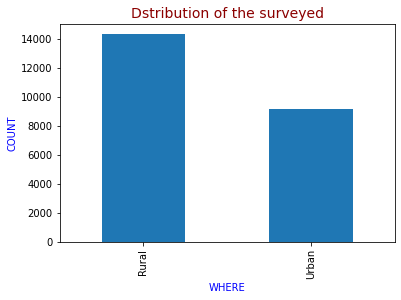

In [ ]:
# Graphing location of those who participated in the survey
df.type_of_location.value_counts().plot.bar()
plt.title('Dstribution of the surveyed', fontdict=title)
plt.xlabel('WHERE', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

**Findings**

Most of the respondents dwell in the rural area

Text(0, 0.5, 'COUNT')

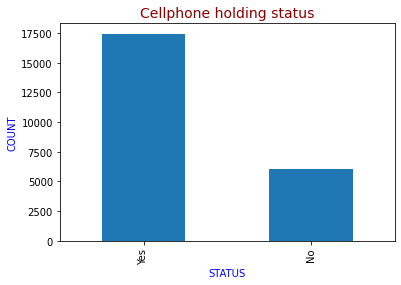

In [ ]:
# Cell Phone Access
df.cell_phone_access.value_counts().plot.bar()
plt.title('Cellphone holding status', fontdict=title)
plt.xlabel('STATUS', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

**Findings**:

Most of the repondents own a cellphone.

**Recommendation**

Innovation around the cellphone can ensure a huge number of the population is banked since most own a cell phone.

**Household Size**

In [ ]:
# Average household size
df.household_size.mean()

3.6818181818181817

In [ ]:
# Most frequent family sizes
df.household_size.mode()

0    2.0
dtype: float64

In [ ]:
# Median family
df.household_size.median()

3.0

In [ ]:
# Range of the families
df.household_size.max() - df.household_size.min()

21.0

In [ ]:
# Quartiles for the household sizes
df.household_size.quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

Text(0, 0.5, 'Value')

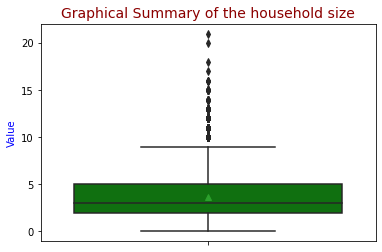

In [ ]:
# Visualizing the above measures
sns.boxplot(df.household_size, showmeans=True, color='green', orient='v')
plt.title('Graphical Summary of the household size', fontdict=title)
plt.ylabel('Value', fontdict=others)

In [ ]:
# Dispersion of the households
# Variance
df.household_size.var()

5.198096306757275

In [ ]:
# The standard deviation
df.household_size.std()

2.279933399631944

In [ ]:
# The skewness of the data
df.household_size.skew()

0.977652354434429

In [ ]:
# Kurtosis
df.household_size.kurt()

1.1581542795310726

In [ ]:
# font dictinary
title = {'family': 'comic','color':  'darkred','weight': 'normal','size': 14}
others = {'family': 'comic','color':  'blue','weight': 'normal','size': 10}

Text(0, 0.5, 'Proportion')

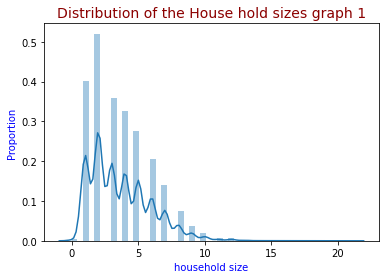

In [ ]:
# Visualizing the household data
sns.distplot(df.household_size)
plt.title('Distribution of the House hold sizes graph 1', fontdict=title)
plt.xlabel('household size', fontdict=others)
plt.ylabel('Proportion', fontdict=others)

Text(0, 0.5, 'Count')

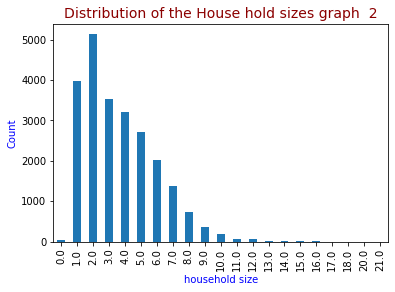

In [ ]:
df['household_size'].value_counts().sort_index().plot.bar()
plt.title('Distribution of the House hold sizes graph  2', fontdict=title)
plt.xlabel('household size', fontdict=others)
plt.ylabel('Count', fontdict=others)

**Findings**

1. The household size data is positively skewed
2. There are outliers in the data
3. The average household size is 3.6 
4. The most common family size is 2

Respondent age

In [ ]:
# Average age
df.respondent_age.mean()

38.804299702000854

In [ ]:
# Most common age of the surveyed
df.respondent_age.mode()

0    30.0
dtype: float64

In [ ]:
# Median age
df.respondent_age.median()

35.0

In [ ]:
# Range of the ages
df.respondent_age.max() - df.respondent_age.min()

84.0

In [ ]:
# Quartiles distribution for the ages
df.respondent_age.quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

Text(0, 0.5, 'age')

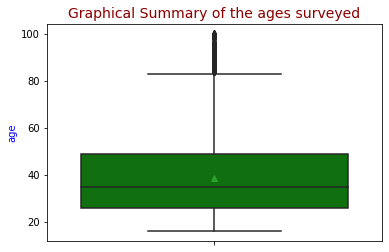

In [ ]:
# Visualizing the above measures
# This will also show presence of outliers
sns.boxplot(df.respondent_age, showmeans=True, color='green', orient='v')
plt.title('Graphical Summary of the ages surveyed', fontdict=title)
plt.ylabel('age', fontdict=others)

In [ ]:
# Dispersion of the ages
# Variance
df.respondent_age.var()

272.9102714347262

In [ ]:
# The standard deviation
df.respondent_age.std()

16.51999610879876

In [ ]:
# The skewness of the data
df.respondent_age.skew()

0.8418012375387167

In [ ]:
# Kurtosis
df.respondent_age.kurt()

0.10110811880734305

Text(0, 0.5, 'Proportion')

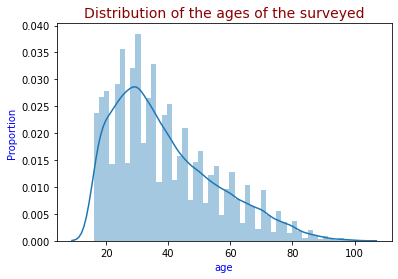

In [ ]:
# Visualizing the distribution of the ages
sns.distplot(df.respondent_age)
plt.title('Distribution of the ages of the surveyed', fontdict=title)
plt.xlabel('age', fontdict=others)
plt.ylabel('Proportion', fontdict=others)

Text(0, 0.5, 'Count')

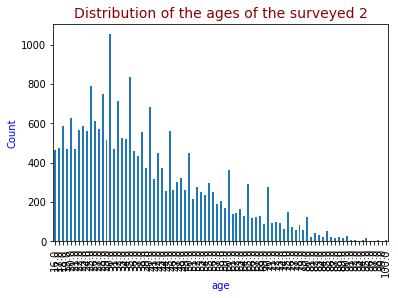

In [ ]:
df['respondent_age'].value_counts().sort_index().plot.bar()
plt.title('Distribution of the ages of the surveyed 2', fontdict=title)
plt.xlabel('age', fontdict=others)
plt.ylabel('Count', fontdict=others)

**Findings:**

1. The average age of the respondents was 38
2. Most of the respondents were aged 30
3. There is a great variability in the data with the youngest aged 16 and the oldest being aged 100
4. The age data is positively skewed
5. The median age is 35 
6. There are outliers in the data

**Recommendation:**

With the data being positively skewed the median would be a better measure of central tendency than the mean

Gender

In [ ]:
df.gender_of_respondent.value_counts()

Female    13859
Male       9631
Name: gender_of_respondent, dtype: int64

Text(0, 0.5, 'COUNT')

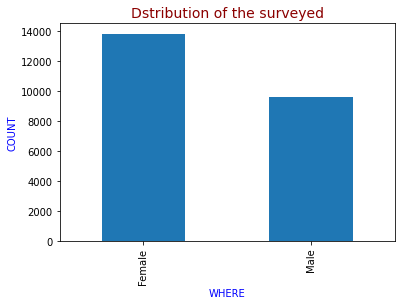

In [ ]:
# Graphing gender of those who participated in the survey
df.gender_of_respondent.value_counts().plot.bar()
plt.title('Dstribution of Gender surveyed', fontdict=title)
plt.xlabel('GENDER', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

Findings

Most of the repondents were female

Relationship with the head

In [ ]:
df.the_relathip_with_head.value_counts()

Head of Household      12829
Spouse                  6518
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: the_relathip_with_head, dtype: int64

Text(0, 0.5, 'COUNT')

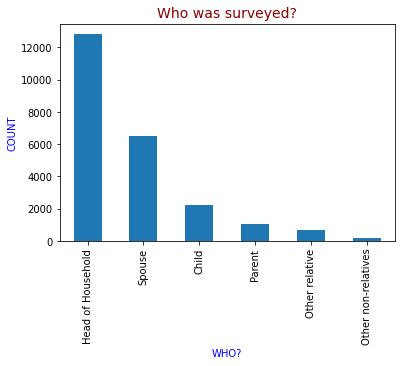

In [ ]:
# Visualizing who was surveyed
df.the_relathip_with_head.value_counts().plot.bar()
plt.title('Who was surveyed?', fontdict=title)
plt.xlabel('WHO?', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

Findings

Most of those who participated in the survey were heads of household

Marital status

In [ ]:
df.marital_status.value_counts()

Married/Living together    10739
Single/Never Married        7971
Widowed                     2702
Divorced/Seperated          2072
Dont know                      8
Name: marital_status, dtype: int64

Text(0, 0.5, 'COUNT')

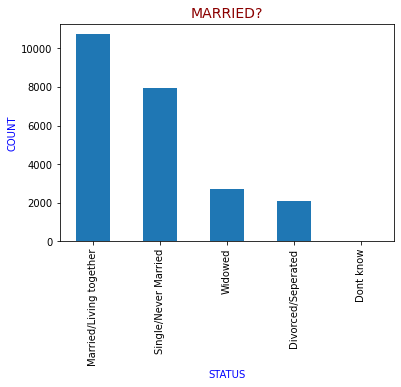

In [ ]:
# Graphing marital status of those who participated in the survey
df.marital_status.value_counts().plot.bar()
plt.title('MARRIED?', fontdict=title)
plt.xlabel('STATUS', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

Finding:

Most of those who took part in the survey are married

Level of education

In [ ]:
df.level_of_educuation.value_counts()

Primary education                  12775
No formal education                 4506
Secondary education                 4220
Tertiary education                  1156
Vocational/Specialised training      803
6                                     27
Other/Dont know/RTA                    8
Name: level_of_educuation, dtype: int64

**Assumption**

Summary of the above information shows that 27 people have 6 as the level of education. Most likely these went to school till primary six and so these will be replaced as Primary education

In [ ]:
# Replacing of the 6
df['level_of_educuation'] = df['level_of_educuation'].replace(['6'],['Primary education'])

In [ ]:
# New summary
df.level_of_educuation.value_counts()

Primary education                  12802
No formal education                 4506
Secondary education                 4220
Tertiary education                  1156
Vocational/Specialised training      803
Other/Dont know/RTA                    8
Name: level_of_educuation, dtype: int64

Text(0, 0.5, 'Count')

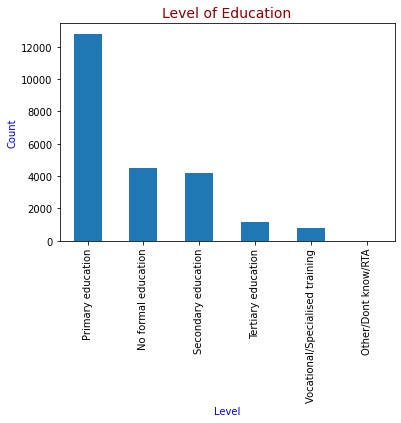

In [ ]:
# Visualizing the groupings
# Graphing level of education of those who participated in the survey
df.level_of_educuation.value_counts().plot.bar()
plt.title('Level of Education', fontdict=title)
plt.xlabel('Level', fontdict=others)
plt.ylabel('Count', fontdict=others)

The following are realised:

1. Most of the respondents possess primary education

2. Almost half of the population never went past primary education with a third of this population having no formal education.

Type of job

In [ ]:
df.type_of_job.value_counts()

Self employed                   6428
Informally employed             5587
Farming and Fishing             5433
Remittance Dependent            2524
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: type_of_job, dtype: int64

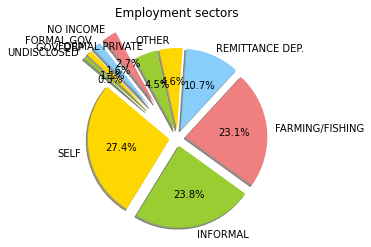

In [ ]:
# Visualizing the counts using a pie chart
x = list(df.type_of_job.value_counts())
labels = ['SELF','INFORMAL','FARMING/FISHING','REMITTANCE DEP.', 'OTHER','FORMAL PRIVATE',
          'NO INCOME','FORMAL GOV','GOV. DEP', 'UNDISCLOSED']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5)
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Employment sectors')
plt.show()

**From above the following is realised**

1. Most of the respondents are in one way or anothe from the informal sector encoded as either "informal", "farming/fishing" or "self" (self employed). There is a high likelihood that most of these are the unbanked.

2. Formal sector employs very few of the respondents

**BIVARIATE ANALYSIS**

The data available can be categorised as follows:

1. **Categorical** - country, year, has_a_bank_account, type_of_location, cell_phone_access, gender_of_respondent, the_relationship_with_head, marital_status, level_of_education, type_of_job

2. **Numerical** - household_size, repondent_age

Condicting bivariate analysis on the numerical data

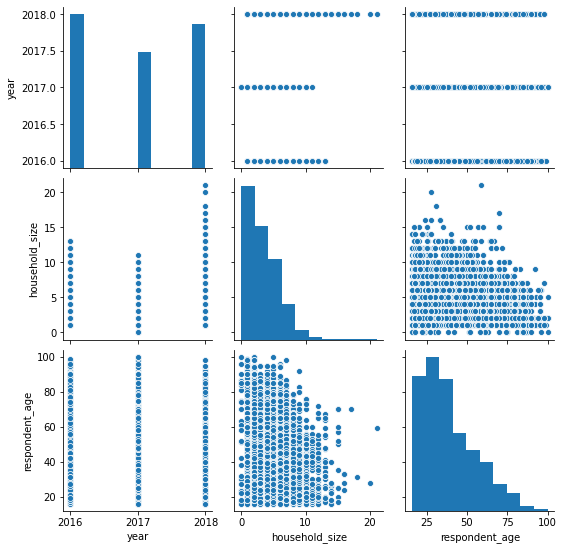

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

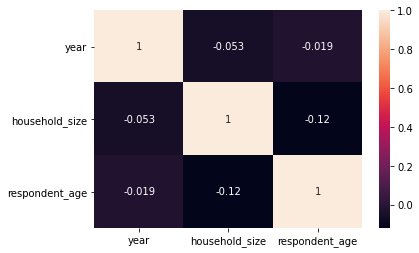

In [ ]:
x = df[['year','household_size','respondent_age']]
sns.heatmap(x.corr(),annot=True)
plt.show()

There is not any linear data in the plotted data above

The correlation coeffiecient above indicates that there is weak, very weak negative correlation between the variables.

**Notwithstanding, that is not the focuss of this analysis**

**Chi-square test**

In [190]:
import scipy.stats
from scipy.stats import chi2

In [ ]:
# Computing the observed values cross table
contingency_table = pd.crosstab(df.has_a_bank_account, df.type_of_location)
Observed_Values = contingency_table.values
Observed_Values

array([[12659,  7513],
       [ 1668,  1641]])

In [ ]:
# Computing expected values
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
Expected_Values

array([[12308.00408841,  7863.99591159],
       [ 2018.99591159,  1290.00408841]])

In [ ]:
# Degrees of Freedom
no_of_rows = len(contingency_table.iloc[0:2,0])
no_of_columns = len(contingency_table.iloc[0,0:2])
deg_free = (no_of_rows-1)*(no_of_columns-1)
deg_free

1

In [ ]:
# Setting the significance level at 5%
alpha=0.05

In [185]:
# chi-square statistic - χ2
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
chi_square_statistic

182.19732047162816

In [186]:
# Critical_value
critical_value = chi2.ppf(q=1-alpha,df=deg_free)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [199]:
# p-value
p_value = 1-stats.chi2.cdf(x = chi_square_statistic,df = deg_free)
p_value

0.0

In [198]:
# Computing the observed values cross table
contingency_table = pd.crosstab(df.has_a_bank_account, df.level_of_educuation)
Observed_Values = contingency_table.values

# Computing expected values
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

# Degrees of Freedom
no_of_rows = len(contingency_table.iloc[0:2,0])
no_of_columns = len(contingency_table.iloc[0,0:2])
deg_free = (no_of_rows-1)*(no_of_columns-1)

# Setting the significance level at 5%
alpha=0.05

# chi-square statistic - χ2
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

# Critical_value
critical_value = chi2.ppf(q=1-alpha,df=deg_free)

# p-value
p_value = 1- stats.chi2.cdf(x = chi_square_statistic,df = deg_free)

# p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
#                              df=4)

print('Significance level: ',alpha)
print('Degree of Freedom: ',deg_free)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 409.74276824532643
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


**MULTIVARIATE ANALYSIS**


In [202]:
# Preprocessing our data
X = df.drop('has_a_bank_account', 1)
y = df['has_a_bank_account']

In [203]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [205]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   has_a_bank_account      23488 non-null  object 
 4   type_of_location        23509 non-null  object 
 5   cell_phone_access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   respondent_age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   the_relathip_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  level_of_educuation     23495 non-null  object 
 12  type_of_job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.1+ MB
